In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#read .data file, and use the feature name get by the last by the code before.
data=pd.read_table('MI.data',header=None,names=['ID','AGE','SEX','INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','IBS_NASL','GB','SIM_GIPERT','DLIT_AG','ZSN_A','nr_11','nr_01','nr_02','nr_03','nr_04','nr_07','nr_08','np_01','np_04','np_05','np_07','np_08','np_09','np_10','endocr_01','endocr_02','endocr_03','zab_leg_01','zab_leg_02','zab_leg_03','zab_leg_04','zab_leg_06','S_AD_KBRIG','D_AD_KBRIG','S_AD_ORIT','D_AD_ORIT','O_L_POST','K_SH_POST','MP_TP_POST','SVT_POST','GT_POST','FIB_G_POST','ant_im','lat_im','inf_im','post_im','IM_PG_P','ritm_ecg_p_01','ritm_ecg_p_02','ritm_ecg_p_04','ritm_ecg_p_06','ritm_ecg_p_07','ritm_ecg_p_08','n_r_ecg_p_01','n_r_ecg_p_02','n_r_ecg_p_03','n_r_ecg_p_04','n_r_ecg_p_05','n_r_ecg_p_06','n_r_ecg_p_08','n_r_ecg_p_09','n_r_ecg_p_10','n_p_ecg_p_01','n_p_ecg_p_03','n_p_ecg_p_04','n_p_ecg_p_05','n_p_ecg_p_06','n_p_ecg_p_07','n_p_ecg_p_08','n_p_ecg_p_09','n_p_ecg_p_10','n_p_ecg_p_11','n_p_ecg_p_12','fibr_ter_01','fibr_ter_02','fibr_ter_03','fibr_ter_05','fibr_ter_06','fibr_ter_07','fibr_ter_08','GIPO_K','K_BLOOD','GIPER_NA','NA_BLOOD','ALT_BLOOD','AST_BLOOD','KFK_BLOOD','L_BLOOD','ROE','TIME_B_S','R_AB_1_n','R_AB_2_n','R_AB_3_n','NA_KB','NOT_NA_KB','LID_KB','NITR_S','NA_R_1_n','NA_R_2_n','NA_R_3_n','NOT_NA_1_n','NOT_NA_2_n','NOT_NA_3_n','LID_S_n','B_BLOK_S_n','ANT_CA_S_n','GEPAR_S_n','ASP_S_n','TIKL_S_n','TRENT_S_n','FIBR_PREDS','PREDS_TAH','JELUD_TAH','FIBR_JELUD','A_V_BLOK','OTEK_LANC','RAZRIV','DRESSLER','ZSN','REC_IM','P_IM_STEN','LET_IS'],sep=',')
#generate the csv file.
data.to_csv('MI.csv',index=False)

In [3]:
#Load the csv data
df = pd.read_csv('MI.csv')

In [4]:
#df.head(5)

In [5]:
#df.tail(5)

In [6]:
# to check the data dimensions in terms of rows by columns use the df.shape()
df.shape

(1700, 124)

In [7]:
df.drop('ID', axis = 1, inplace = True)

In [8]:
#df.tail(5)

In [9]:
# df.info() prints information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: int64(13), object(110)
memory usage: 1.6+ MB


In [10]:
df['S_AD_KBRIG'] = pd.to_numeric(df['S_AD_KBRIG'], errors='coerce').astype('Int64')  
df['D_AD_KBRIG'] = pd.to_numeric(df['D_AD_KBRIG'], errors='coerce').astype('Int64')
df['S_AD_ORIT'] = pd.to_numeric(df['S_AD_ORIT'], errors='coerce').astype('Int64')
df['D_AD_ORIT'] = pd.to_numeric(df['D_AD_ORIT'], errors='coerce').astype('Int64')

df['K_BLOOD'] = pd.to_numeric(df['K_BLOOD'], errors='coerce')
df['L_BLOOD'] = pd.to_numeric(df['L_BLOOD'], errors='coerce')

df['NA_BLOOD'] = pd.to_numeric(df['NA_BLOOD'], errors='coerce').astype('Int64')
df['ROE'] = pd.to_numeric(df['ROE'], errors='coerce').astype('Int64')

df['ALT_BLOOD'] = pd.to_numeric(df['ALT_BLOOD'], errors='coerce')
df['AST_BLOOD'] = pd.to_numeric(df['AST_BLOOD'], errors='coerce')



In [11]:
df.replace('?', np.nan, inplace=True)

In [12]:
# df.info() prints information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: Int64(6), float64(4), int64(13), object(100)
memory usage: 1.6+ MB


In [13]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Prints the percentage of missing values for each column
print(missing_percentage)

AGE          0.470588
SEX          0.000000
INF_ANAM     0.235294
STENOK_AN    6.235294
FK_STENOK    4.294118
               ...   
DRESSLER     0.000000
ZSN          0.000000
REC_IM       0.000000
P_IM_STEN    0.000000
LET_IS       0.000000
Length: 123, dtype: float64


In [14]:
# find the columns missing % > 50%
columns_to_drop = missing_percentage[missing_percentage > 50].index

# delete these columns
df_cleaned = df.drop(columns=columns_to_drop)

# print the columns info
print("deleted columns:", columns_to_drop.tolist())
print("remain columns:", df_cleaned.columns.tolist())

# print the detaframe info after processing the columns
print(df_cleaned.info())

deleted columns: ['IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD']
remain columns: ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12

In [15]:
df_cleaned.shape

(1700, 119)

In [16]:
dfnum=df_cleaned.drop(columns=['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03',
                       'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
                       'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST',
                       'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06',
                       'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
                       'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06',
                       'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',
                       'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'GIPER_NA',
                       'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n',
                       'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH',
                       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'])

In [17]:
dfnum

,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE
0,180,100,4.7,138,NaN,NaN,8.0,16
1,120,90,3.5,132,0.38,0.18,7.8,3
2,180,100,4.0,132,0.30,0.11,10.8,<NA>
3,120,70,3.9,146,0.75,0.37,NaN,<NA>
4,160,90,3.5,132,0.45,0.22,8.3,<NA>
...,...,...,...,...,...,...,...,...
1695,110,70,3.7,130,1.05,0.52,12.8,6
1696,50,0,NaN,<NA>,NaN,NaN,NaN,<NA>
1697,70,50,NaN,<NA>,0.23,0.15,8.3,13
1698,110,70,3.1,136,0.45,0.45,7.5,4


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [19]:
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,verbose=2,max_iter=100, tol=1e-10, imputation_order='roman')

In [ ]:
dfnum2=imp.fit_transform(dfnum)

In [21]:
dfnum3=pd.DataFrame(dfnum2,columns=('S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD','ALT_BLOOD','AST_BLOOD','L_BLOOD','ROE'))

In [22]:
dfnum3

,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE
0,180.0,100.0,4.700000,138.000000,0.406356,0.232464,8.000000,16.000000
1,120.0,90.0,3.500000,132.000000,0.380000,0.180000,7.800000,3.000000
2,180.0,100.0,4.000000,132.000000,0.300000,0.110000,10.800000,15.244862
3,120.0,70.0,3.900000,146.000000,0.750000,0.370000,9.497604,13.011914
4,160.0,90.0,3.500000,132.000000,0.450000,0.220000,8.300000,14.449848
...,...,...,...,...,...,...,...,...
1695,110.0,70.0,3.700000,130.000000,1.050000,0.520000,12.800000,6.000000
1696,50.0,0.0,4.223917,136.765449,0.510187,0.304601,11.639645,14.975913
1697,70.0,50.0,4.077010,135.764794,0.230000,0.150000,8.300000,13.000000
1698,110.0,70.0,3.100000,136.000000,0.450000,0.450000,7.500000,4.000000


In [23]:
dfcat=df_cleaned.drop(columns=['S_AD_ORIT', 'D_AD_ORIT', 'NA_BLOOD',
       'ROE','K_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD'])

In [24]:
dfcat

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,1,0,1,0,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1697,55,1,3,6,2,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,79,0,2,2,2,1,2,0,7,NaN,...,0,0,0,1,0,0,0,0,0,1


In [25]:
categorical_columns = dfcat.columns

for col in categorical_columns:
    
    dfcat[col] = pd.to_numeric(dfcat[col], errors='coerce')
    mode_value = dfcat[col].mode()[0]  
    dfcat[col] = dfcat[col].fillna(mode_value).astype(int)  


In [26]:
x=pd.concat([dfnum3,dfcat],axis=1)

In [27]:
x =x.drop(columns=['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'])

In [28]:
x

,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,AGE,SEX,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,180.0,100.0,4.700000,138.000000,0.406356,0.232464,8.000000,16.000000,77,1,...,0,0,0,1,0,0,1,1,0,0
1,120.0,90.0,3.500000,132.000000,0.380000,0.180000,7.800000,3.000000,55,1,...,1,0,0,1,0,1,1,1,0,1
2,180.0,100.0,4.000000,132.000000,0.300000,0.110000,10.800000,15.244862,52,1,...,3,2,2,1,1,0,1,1,0,0
3,120.0,70.0,3.900000,146.000000,0.750000,0.370000,9.497604,13.011914,68,0,...,0,0,0,0,0,1,1,1,0,0
4,160.0,90.0,3.500000,132.000000,0.450000,0.220000,8.300000,14.449848,60,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,110.0,70.0,3.700000,130.000000,1.050000,0.520000,12.800000,6.000000,77,0,...,0,0,0,0,0,0,0,0,0,0
1696,50.0,0.0,4.223917,136.765449,0.510187,0.304601,11.639645,14.975913,70,0,...,0,0,0,1,0,0,0,0,0,0
1697,70.0,50.0,4.077010,135.764794,0.230000,0.150000,8.300000,13.000000,55,1,...,0,0,0,0,1,0,1,1,0,0
1698,110.0,70.0,3.100000,136.000000,0.450000,0.450000,7.500000,4.000000,79,0,...,1,0,0,1,0,1,1,1,0,0


In [29]:
y=df_cleaned['ZSN']

In [30]:
a=pd.concat([x,y],axis=1)

In [31]:
a

,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,AGE,SEX,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,180.0,100.0,4.700000,138.000000,0.406356,0.232464,8.000000,16.000000,77,1,...,0,0,1,0,0,1,1,0,0,0
1,120.0,90.0,3.500000,132.000000,0.380000,0.180000,7.800000,3.000000,55,1,...,0,0,1,0,1,1,1,0,1,0
2,180.0,100.0,4.000000,132.000000,0.300000,0.110000,10.800000,15.244862,52,1,...,2,2,1,1,0,1,1,0,0,0
3,120.0,70.0,3.900000,146.000000,0.750000,0.370000,9.497604,13.011914,68,0,...,0,0,0,0,1,1,1,0,0,1
4,160.0,90.0,3.500000,132.000000,0.450000,0.220000,8.300000,14.449848,60,1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,110.0,70.0,3.700000,130.000000,1.050000,0.520000,12.800000,6.000000,77,0,...,0,0,0,0,0,0,0,0,0,0
1696,50.0,0.0,4.223917,136.765449,0.510187,0.304601,11.639645,14.975913,70,0,...,0,0,1,0,0,0,0,0,0,0
1697,70.0,50.0,4.077010,135.764794,0.230000,0.150000,8.300000,13.000000,55,1,...,0,0,0,1,0,1,1,0,0,0
1698,110.0,70.0,3.100000,136.000000,0.450000,0.450000,7.500000,4.000000,79,0,...,0,0,1,0,1,1,1,0,0,0


In [32]:
a.to_excel("final_used_data.xlsx", index=False)

In [33]:
column_names = a.columns[:108]
print("remain columns:",  column_names.tolist())

remain columns: ['S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', '

In [34]:
u=a.iloc[:,:-1]
v=a['ZSN']

In [ ]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Create a unique directory name using a timestamp
base_dir = 'D:\AA-University\Year4\Semester1\ML\feature_plots_for_CW1'
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = os.path.join(base_dir, f'Kernel_Plots_{timestamp}')

# Create the new directory
os.makedirs(output_dir, exist_ok=True)

# Filter only numeric columns for plotting
features_to_plot = a.select_dtypes(include=['float64', 'int64']).columns

# Set the visual parameters for the plots
sns.set(font_scale=1.5)
sns.set_style("white")

# Generate individual kernel density plots
for feature in features_to_plot:
    plt.figure(figsize=(8, 6), dpi=600)
    ax = sns.kdeplot(data=a, x=feature, hue="ZSN", fill=True)
    plt.title(f'Kernel Distribution of {feature.upper()}')
    plt.xlabel(feature.title())
    plt.ylabel('Density')
    
    # Save the plot
    plot_filename = f'Kernel_Plot_{feature}.png'
    plot_path = os.path.join(output_dir, plot_filename)
    plt.tight_layout()
    plt.savefig(plot_path)
    
    plt.show()

print(f"Plots have been saved to: {output_dir}")


In [36]:
y_counts = v.value_counts(normalize=True) * 100
print("y_resample  0 & 1 percentage：")
print(y_counts)

y_resample  0 & 1 percentage：
ZSN
0    76.823529
1    23.176471
Name: proportion, dtype: float64


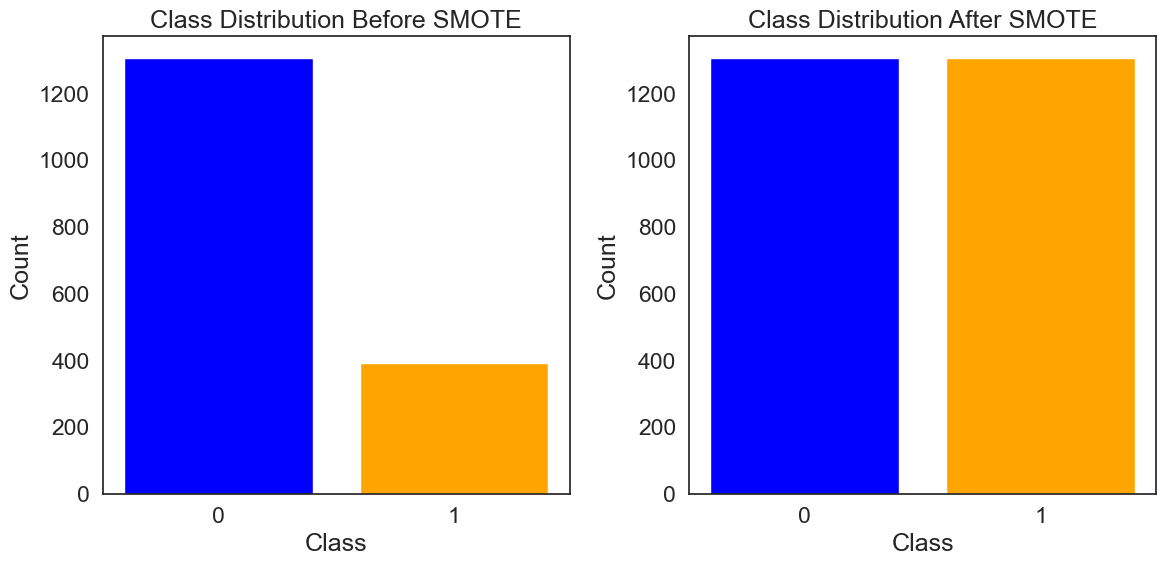

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from imblearn.over_sampling import SVMSMOTE

# Before SMOTE class distribution
counter_before = Counter(v)

# Apply SVMSMOTE
sm = SVMSMOTE()
u_resample, y_resample = sm.fit_resample(u, v)

# After SMOTE class distribution
counter_after = Counter(y_resample)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(counter_before.keys(), counter_before.values(), color=['blue', 'orange'])
ax[0].set_title("Class Distribution Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["0", "1"])

ax[1].bar(counter_after.keys(), counter_after.values(), color=['blue', 'orange'])
ax[1].set_title("Class Distribution After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["0", "1"])

plt.tight_layout()
plt.show()


In [38]:
y_counts = y_resample.value_counts(normalize=True) * 100
print("y_resample  0 & 1 percentage：")
print(y_counts)

y_resample  0 & 1 percentage：
ZSN
0    50.0
1    50.0
Name: proportion, dtype: float64


In [39]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
u_scaled = scaler.fit_transform(u_resample)

In [40]:
# Train-test split Method
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(u_scaled, y_resample, test_size=0.2, random_state=0)

In [41]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier


classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ]),
    "StackingClassifier": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
    ], final_estimator=LogisticRegression(), stack_method='predict_proba'),
    "BaggingClassifier": BaggingClassifier()
}

param_grids = {
    "Logistic Regression": {
        'C': [0.9, 0.95, 1, 1.05, 1.1], 
        'solver': ['liblinear', 'lbfgs'],  
    },
    
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 4, 5, 6, 7, 8],   
        'weights': ['distance'],              
        'p': [1, 2, 3]                        
    },
    
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],          
        'max_depth': [8, 10, 12, 15],              
        'min_samples_split': [18, 20, 22],         
        'min_samples_leaf': [1, 2, 5]              
    },
    
    "Support Vector Machine": {
        'C': [4, 5, 6, 7, 10],          
        'gamma': ['scale', 0.05, 0.1, 0.3, 0.5],  
        'kernel': ['rbf']                 
    },
    
    "AdaBoost": {
        'n_estimators': [350, 400, 450],
        'learning_rate': [0.3, 0.35, 0.4],
        'algorithm': ['SAMME']
    },
    
    "VotingClassifier": {
        'voting': ['soft'],
        'weights': [None, [2, 1, 2, 2], [3, 2, 1, 2],[2, 2, 1, 2]]
    },
    
    "StackingClassifier": {
        'cv': [3, 5],
        'final_estimator': [LogisticRegression(),
                           SVC(probability=True),
                            ],
        'stack_method': ['predict', 'predict_proba']
    },
    
    "BaggingClassifier": {
        'n_estimators': [200, 250, 300],
        'max_samples': [0.7,0.8,0.9, 1.0],
        'max_features': [0.3,0.4,0.5, 0.7, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }
}


In [42]:

import os
import time
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_curve, auc, precision_recall_curve, confusion_matrix, 
                             make_scorer)
from sklearn.model_selection import cross_validate, learning_curve, GridSearchCV, KFold

# Define scoring metrics for cross-validation
scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',  # ROC AUC score
    'specificity': make_scorer(recall_score, pos_label=0),  # Custom scorer for specificity
    'pr_auc': 'average_precision'  # Precision-Recall AUC score
}

# Create folders for saving confusion matrices, ROC-AUC plots, Precision-Recall curves, and learning curves
new_folder = "ZSN_GridCVOptimizedML_Results_013"
confusion_matrix_folder = os.path.join(new_folder, "confusion_matrices")
roc_auc_folder = os.path.join(new_folder, "roc_auc_curves")
precision_recall_folder = os.path.join(new_folder, "precision_recall_curves")
learning_curve_folder = os.path.join(new_folder, "learning_curves")
os.makedirs(confusion_matrix_folder, exist_ok=True)
os.makedirs(roc_auc_folder, exist_ok=True)
os.makedirs(precision_recall_folder, exist_ok=True)
os.makedirs(learning_curve_folder, exist_ok=True)

# Reset lists before appending results to avoid duplicates
results_train_test = []

# Loop through classifiers (including Stacking and Voting)
for name, clf in classifiers.items():
    print(f"Optimizing {name}...")

    # Apply GridSearchCV for parameter optimization if parameters are defined
    if name in param_grids:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_clf = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    else:
        # Use default classifier if no grid search is performed
        best_clf = clf.fit(x_train, y_train)

    # Train the classifier
    training_start = time.perf_counter()
    best_clf.fit(x_train, y_train)
    training_end = time.perf_counter()
    train_time = training_end - training_start

    # Make predictions
    if hasattr(best_clf, "predict_proba"):
        y_pred_proba = best_clf.predict_proba(x_test)[:, 1]
        y_pred = best_clf.predict(x_test)
    else:
        y_pred = best_clf.predict(x_test)
        y_pred_proba = None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    test_cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = test_cm.ravel()
    spec = tn / (tn + fp)

    # Calculate ROC-AUC score
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None

    # Calculate Precision-Recall AUC score
    if y_pred_proba is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
    else:
        pr_auc = None

    # Ensure that the results for the best model only are saved
    if name not in [result[0] for result in results_train_test]:
        # Store only the best result for each model
        results_train_test.append([
            name,
            f"{train_time:.4f}",  # Time in seconds
            f"{acc * 100:.2f}",   # Accuracy (%)
            f"{prec * 100:.2f}",  # Precision (%)
            f"{rec * 100:.2f}",   # Recall (%)
            f"{f1 * 100:.2f}",    # F1-Score (%)
            f"{spec * 100:.2f}",  # Specificity (%)
            f"{roc_auc * 100:.2f}" if roc_auc is not None else 'N/A',  # ROC-AUC (%)
            f"{pr_auc * 100:.2f}" if pr_auc is not None else 'N/A'     # PR AUC (%)
        ])

    # Generate and save confusion matrix
    plt.figure(figsize=(8, 6), dpi=600)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20})
    plt.title(f'ZSN_Confusion Matrix - {name}', fontsize=25)
    plt.xlabel('Predicted', fontsize=22)
    plt.ylabel('Actual', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    cm_plot_filepath = os.path.join(confusion_matrix_folder, f'confusion_matrix_{name}.png')
    plt.savefig(cm_plot_filepath)
    plt.close()

    # Plot and save ROC-AUC curve if available
    if roc_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=22)
        plt.ylabel('True Positive Rate', fontsize=22)
        plt.title(f'ZSN_ROC_AUC - {name}', fontsize=25)
        plt.legend(loc="lower right")
        roc_auc_filepath = os.path.join(roc_auc_folder, f'roc_auc_{name}.png')
        plt.savefig(roc_auc_filepath)
        plt.close()

    # Plot and save Precision-Recall curve if available
    if pr_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(recall, precision, color='blue', lw=2, label=f'PR AUC = {pr_auc:.3f}')
        plt.xlabel('Recall', fontsize=22)
        plt.ylabel('Precision', fontsize=22)
        plt.title(f'ZSN_Precision-Recall Curve- {name}', fontsize=25)
        plt.legend(loc="lower left")
        pr_curve_filepath = os.path.join(precision_recall_folder, f'precision_recall_{name}.png')
        plt.savefig(pr_curve_filepath)
        plt.close()
              
    # Plot and save learning curve
    train_sizes, train_scores, test_scores = learning_curve(best_clf, x_train, y_train, cv=KFold(5), n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6), dpi=600)
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.title(f'ZSN_Learning Curve - {name}', fontsize=25)
    plt.xlabel('Training Size', fontsize=22)
    plt.ylabel('Accuracy', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(loc="best")
    plt.tight_layout()
    learning_curve_filepath = os.path.join(learning_curve_folder, f'learning_curve_{name}.png')
    plt.savefig(learning_curve_filepath)
    plt.close()

# Define columns for train-test and cross-validation results
columns = ['Model', 'Time (s)', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Specificity (%)', 'ROC-AUC (%)', 'PR AUC (%)']

# Convert results to DataFrame and save to Excel
df_train_test = pd.DataFrame(results_train_test, columns=columns) 
with pd.ExcelWriter(os.path.join(new_folder, 'ZSN_GridCVOptimizedML_Results013.xlsx')) as writer:
    df_train_test.to_excel(writer, sheet_name='Train-Test Results', index=False)

print("Results saved successfully in 'ZSN_GridCVOptimizedML_Results_013' folder.")


Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.9, 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.7597
Optimizing K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8095
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best cross-validation accuracy for Decision Tree: 0.7501
Optimizing Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 4, 'gamma': 0.05, 'kernel': 'rbf'}
Best cross-validation accuracy for Support Vector Machine: 0.8052
Optimizing AdaBoost...
Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 0.4, 'n_estimators': 450}
Best cross-validation accuracy for AdaBoost: 0.7511
Optimizing VotingClassifier...
Best parameters for VotingClassifier: {'votin

Common Selected Features from Ensemble RFE:
{'SEX', 'GB', 'NA_R_1_n', 'IM_PG_P', 'O_L_POST', 'ALT_BLOOD', 'R_AB_1_n', 'L_BLOOD', 'ANT_CA_S_n', 'K_SH_POST', 'ZSN_A', 'ritm_ecg_p_01', 'TRENT_S_n', 'ASP_S_n', 'S_AD_ORIT', 'LID_S_n', 'zab_leg_02', 'n_p_ecg_p_07', 'FK_STENOK', 'ant_im', 'K_BLOOD', 'D_AD_ORIT', 'AGE', 'ritm_ecg_p_08', 'GIPO_K', 'n_p_ecg_p_03', 'n_r_ecg_p_04', 'ritm_ecg_p_07', 'zab_leg_03', 'MP_TP_POST', 'zab_leg_01', 'B_BLOK_S_n', 'STENOK_AN', 'LID_KB', 'n_r_ecg_p_05', 'NA_R_3_n', 'post_im', 'INF_ANAM', 'IBS_POST', 'DLIT_AG', 'NA_R_2_n', 'n_p_ecg_p_10', 'GEPAR_S_n', 'n_p_ecg_p_12', 'R_AB_2_n', 'ritm_ecg_p_02'}
After Ensemble Feature Selection, selected 46 features out of 107


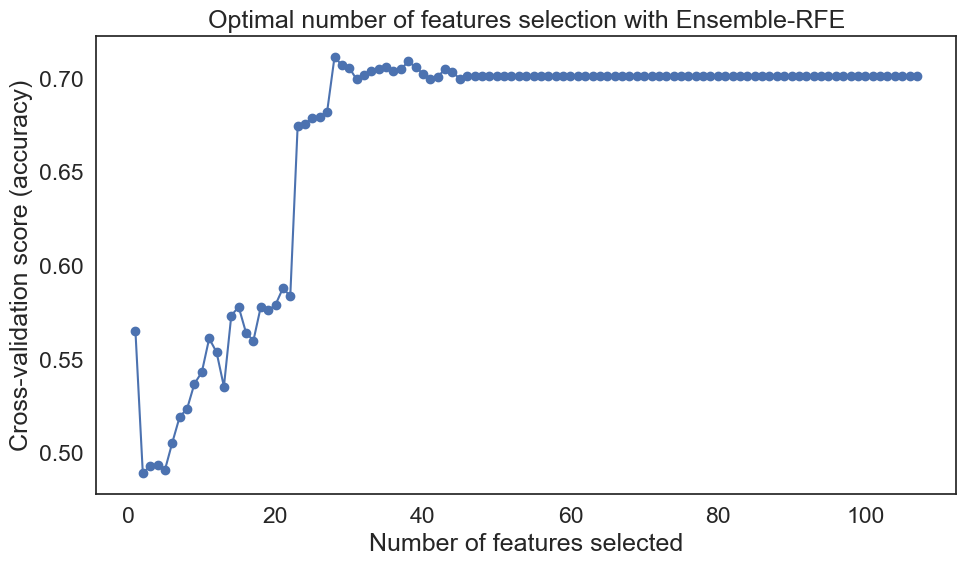

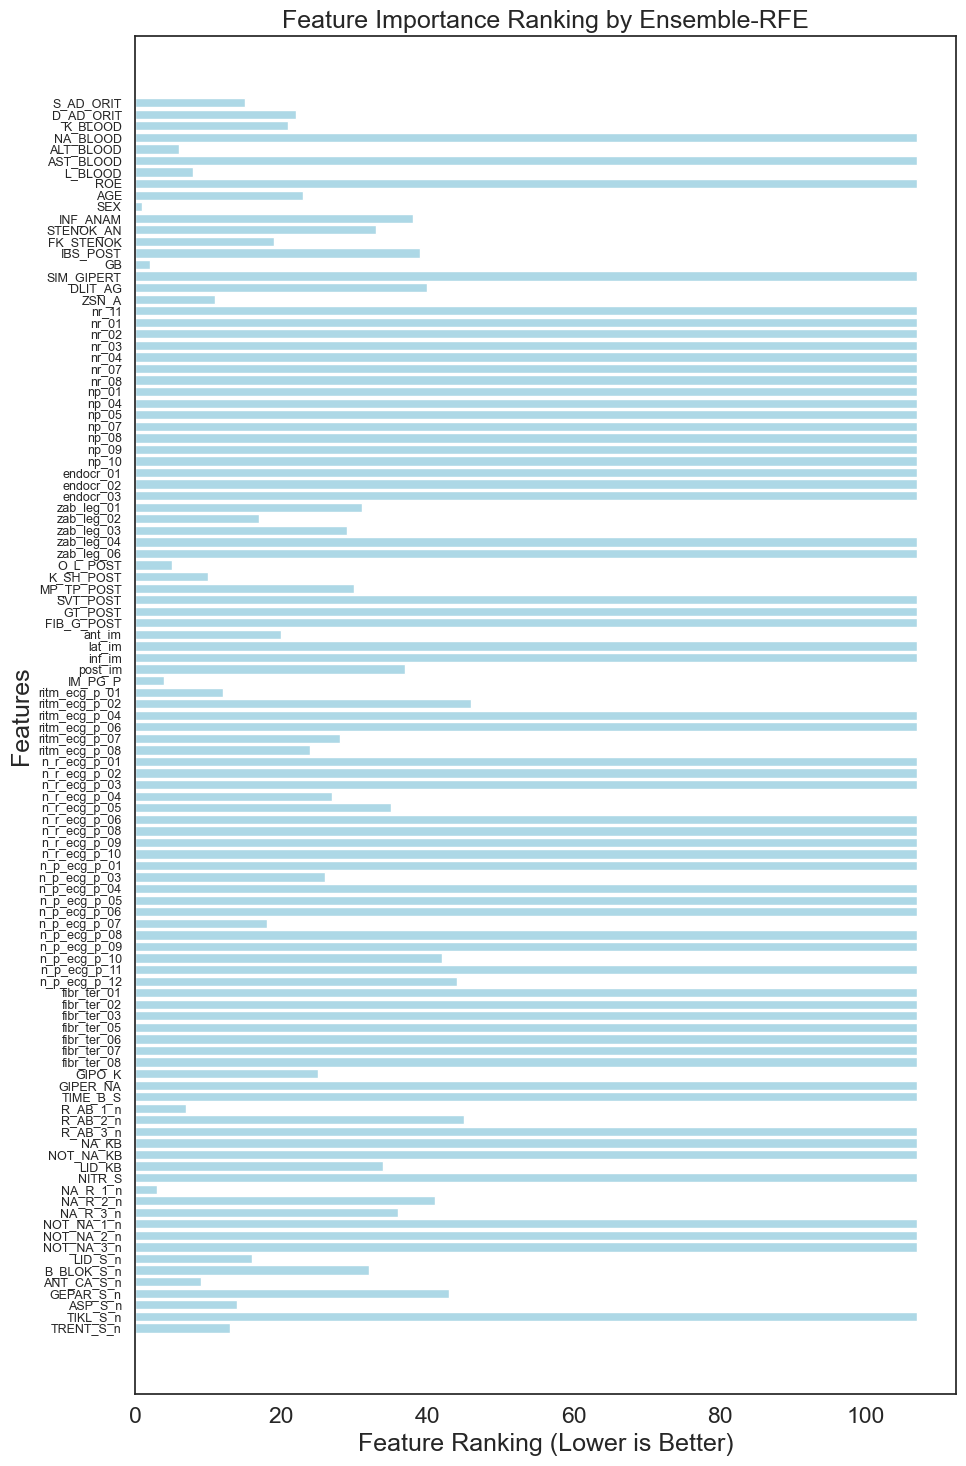

In [59]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Actual feature names from the dataset
feature_names = ['S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT',
                 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
                 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im',
                 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
                 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06',
                 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07',
                 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n',
                 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

svc_model = SVC(kernel='linear', random_state=0)
rf_model = RandomForestClassifier(random_state=0)
log_reg_model = LogisticRegression(max_iter=1000, random_state=0)

n_features_to_select = 70  

rfe_svc = RFE(estimator=svc_model, n_features_to_select=n_features_to_select, step=1)
rfe_rf = RFE(estimator=rf_model, n_features_to_select=n_features_to_select, step=1)
rfe_log_reg = RFE(estimator=log_reg_model, n_features_to_select=n_features_to_select, step=1)

rfe_svc.fit(u_scaled, y_resample)
rfe_rf.fit(u_scaled, y_resample)
rfe_log_reg.fit(u_scaled, y_resample)

selected_features_svc = set([feature for feature, support in zip(feature_names, rfe_svc.support_) if support])
selected_features_rf = set([feature for feature, support in zip(feature_names, rfe_rf.support_) if support])
selected_features_log_reg = set([feature for feature, support in zip(feature_names, rfe_log_reg.support_) if support])

common_selected_features = selected_features_svc & selected_features_rf & selected_features_log_reg
print("Common Selected Features from Ensemble RFE:")
print(common_selected_features)

selected_indices = [feature_names.index(f) for f in common_selected_features]

u_ensemble_rfe = u_scaled[:, selected_indices]
print(f"After Ensemble Feature Selection, selected {u_ensemble_rfe.shape[1]} features out of {u_scaled.shape[1]}")


total_features = len(feature_names)
cv_scores = []

for n in range(1, total_features + 1):
    selected_features_subset = list(common_selected_features)[:n]  
    selected_indices_subset = [feature_names.index(f) for f in selected_features_subset]
    u_subset = u_scaled[:, selected_indices_subset]

    cv_score = cross_val_score(SVC(kernel='linear', random_state=0), u_subset, y_resample, cv=5, scoring='accuracy')
    cv_scores.append(cv_score.mean())

plt.figure(figsize=(10, 6))
plt.plot(range(1, total_features + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.title("Optimal number of features selection with Ensemble-RFE")
plt.tight_layout()
plt.show()

feature_ranking = np.ones(len(feature_names)) * len(feature_names)  
for i, feature in enumerate(common_selected_features):
    feature_index = feature_names.index(feature)
    feature_ranking[feature_index] = i + 1  

plt.figure(figsize=(10, 15))
plt.barh(feature_names, feature_ranking, color='lightblue')
plt.xlabel('Feature Ranking (Lower is Better)')
plt.ylabel('Features')
plt.yticks(fontsize=9)
plt.title('Feature Importance Ranking by Ensemble-RFE')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [44]:
# Use u_rfe instead of u_scaled for train-test split
x_train, x_test, y_train, y_test = train_test_split(u_ensemble_rfe, y_resample, test_size=0.2, random_state=0)

In [45]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
import os
import time
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_curve, auc, precision_recall_curve, confusion_matrix, 
                             make_scorer)
from sklearn.model_selection import cross_validate, learning_curve, GridSearchCV, KFold

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ]),
    "StackingClassifier": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
    ], final_estimator=LogisticRegression(), stack_method='predict_proba'),
    "BaggingClassifier": BaggingClassifier()
}

param_grids = {
    "Logistic Regression": {
        'C': [0.9, 0.95, 1, 1.05, 1.1], 
        'solver': ['liblinear', 'lbfgs'],  
    },
    
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 4, 5, 6, 7, 8],   
        'weights': ['distance'],              
        'p': [1, 2, 3]                        
    },
    
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],          
        'max_depth': [8, 10, 12, 15],              
        'min_samples_split': [18, 20, 22],         
        'min_samples_leaf': [1, 2, 5]              
    },
    
    "Support Vector Machine": {
        'C': [4, 5, 6, 7, 10],          
        'gamma': ['scale', 0.05, 0.1, 0.3, 0.5],  
        'kernel': ['rbf']                 
    },
    
    "AdaBoost": {
        'n_estimators': [350, 400, 450],
        'learning_rate': [0.3, 0.35, 0.4],
        'algorithm': ['SAMME']
    },
    
    "VotingClassifier": {
        'voting': ['soft'],
        'weights': [None, [2, 1, 2, 2], [3, 2, 1, 2],[2, 2, 1, 2]]
    },
    
    "StackingClassifier": {
        'cv': [3, 5],
        'final_estimator': [LogisticRegression(),
                           SVC(probability=True),
                            ],
        'stack_method': ['predict', 'predict_proba']
    },
    
    "BaggingClassifier": {
        'n_estimators': [200, 250, 300],
        'max_samples': [0.7,0.8,0.9, 1.0],
        'max_features': [0.3,0.4,0.5, 0.7, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }
}

# Define scoring metrics for cross-validation
scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',  # ROC AUC score
    'specificity': make_scorer(recall_score, pos_label=0),  # Custom scorer for specificity
    'pr_auc': 'average_precision'  # Precision-Recall AUC score
}

# Create folders for saving confusion matrices, ROC-AUC plots, Precision-Recall curves, and learning curves
new_folder = "ZSN_GridCVOptimizedML_Results_ORFE01"
confusion_matrix_folder = os.path.join(new_folder, "confusion_matrices")
roc_auc_folder = os.path.join(new_folder, "roc_auc_curves")
precision_recall_folder = os.path.join(new_folder, "precision_recall_curves")
learning_curve_folder = os.path.join(new_folder, "learning_curves")
os.makedirs(confusion_matrix_folder, exist_ok=True)
os.makedirs(roc_auc_folder, exist_ok=True)
os.makedirs(precision_recall_folder, exist_ok=True)
os.makedirs(learning_curve_folder, exist_ok=True)

# Reset lists before appending results to avoid duplicates
results_train_test = []

# Loop through classifiers (including Stacking and Voting)
for name, clf in classifiers.items():
    print(f"Optimizing {name}...")

    # Apply GridSearchCV for parameter optimization if parameters are defined
    if name in param_grids:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_clf = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    else:
        # Use default classifier if no grid search is performed
        best_clf = clf.fit(x_train, y_train)

    # Train the classifier
    training_start = time.perf_counter()
    best_clf.fit(x_train, y_train)
    training_end = time.perf_counter()
    train_time = training_end - training_start

    # Make predictions
    if hasattr(best_clf, "predict_proba"):
        y_pred_proba = best_clf.predict_proba(x_test)[:, 1]
        y_pred = best_clf.predict(x_test)
    else:
        y_pred = best_clf.predict(x_test)
        y_pred_proba = None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    test_cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = test_cm.ravel()
    spec = tn / (tn + fp)

    # Calculate ROC-AUC score
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None

    # Calculate Precision-Recall AUC score
    if y_pred_proba is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
    else:
        pr_auc = None

    # Ensure that the results for the best model only are saved
    if name not in [result[0] for result in results_train_test]:
        # Store only the best result for each model
        results_train_test.append([
            name,
            f"{train_time:.4f}",  # Time in seconds
            f"{acc * 100:.2f}",   # Accuracy (%)
            f"{prec * 100:.2f}",  # Precision (%)
            f"{rec * 100:.2f}",   # Recall (%)
            f"{f1 * 100:.2f}",    # F1-Score (%)
            f"{spec * 100:.2f}",  # Specificity (%)
            f"{roc_auc * 100:.2f}" if roc_auc is not None else 'N/A',  # ROC-AUC (%)
            f"{pr_auc * 100:.2f}" if pr_auc is not None else 'N/A'     # PR AUC (%)
        ])

    # Generate and save confusion matrix
    plt.figure(figsize=(8, 6), dpi=600)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20})
    plt.title(f'ZSN_Confusion Matrix - {name}', fontsize=25)
    plt.xlabel('Predicted', fontsize=22)
    plt.ylabel('Actual', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    cm_plot_filepath = os.path.join(confusion_matrix_folder, f'confusion_matrix_{name}.png')
    plt.savefig(cm_plot_filepath)
    plt.close()

    # Plot and save ROC-AUC curve if available
    if roc_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=22)
        plt.ylabel('True Positive Rate', fontsize=22)
        plt.title(f'ZSN_ROC_AUC - {name}', fontsize=25)
        plt.legend(loc="lower right")
        roc_auc_filepath = os.path.join(roc_auc_folder, f'roc_auc_{name}.png')
        plt.savefig(roc_auc_filepath)
        plt.close()

    # Plot and save Precision-Recall curve if available
    if pr_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(recall, precision, color='blue', lw=2, label=f'PR AUC = {pr_auc:.3f}')
        plt.xlabel('Recall', fontsize=22)
        plt.ylabel('Precision', fontsize=22)
        plt.title(f'ZSN_Precision-Recall Curve- {name}', fontsize=25)
        plt.legend(loc="lower left")
        pr_curve_filepath = os.path.join(precision_recall_folder, f'precision_recall_{name}.png')
        plt.savefig(pr_curve_filepath)
        plt.close()
              
    # Plot and save learning curve
    train_sizes, train_scores, test_scores = learning_curve(best_clf, x_train, y_train, cv=KFold(5), n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6), dpi=600)
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.title(f'ZSN_Learning Curve - {name}', fontsize=25)
    plt.xlabel('Training Size', fontsize=22)
    plt.ylabel('Accuracy', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(loc="best")
    plt.tight_layout()
    learning_curve_filepath = os.path.join(learning_curve_folder, f'learning_curve_{name}.png')
    plt.savefig(learning_curve_filepath)
    plt.close()

# Define columns for train-test and cross-validation results
columns = ['Model', 'Time (s)', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Specificity (%)', 'ROC-AUC (%)', 'PR AUC (%)']

# Convert results to DataFrame and save to Excel
df_train_test = pd.DataFrame(results_train_test, columns=columns) 
with pd.ExcelWriter(os.path.join(new_folder, 'ZSN_GridCVOptimizedML_Results_ORFE01.xlsx')) as writer:
    df_train_test.to_excel(writer, sheet_name='Train-Test Results', index=False)

print("Results saved successfully in 'ZSN_GridCVOptimizedML_Results_ORFE01' folder.")


Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.9, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.7520
Optimizing K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.7923
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 18}
Best cross-validation accuracy for Decision Tree: 0.7578
Optimizing Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy for Support Vector Machine: 0.8100
Optimizing AdaBoost...
Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 0.4, 'n_estimators': 450}
Best cross-validation accuracy for AdaBoost: 0.7487
Optimizing VotingClassifier...
Best parameters for VotingClassifier: {'voti

Early stopping: No significant change in feature selection after 1 iterations.
Boruta selected features:
['S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'AGE', 'SEX', 'GB', 'DLIT_AG', 'ZSN_A', 'ant_im', 'TIME_B_S']
Boruta with early stop, selected 15 features out of 107


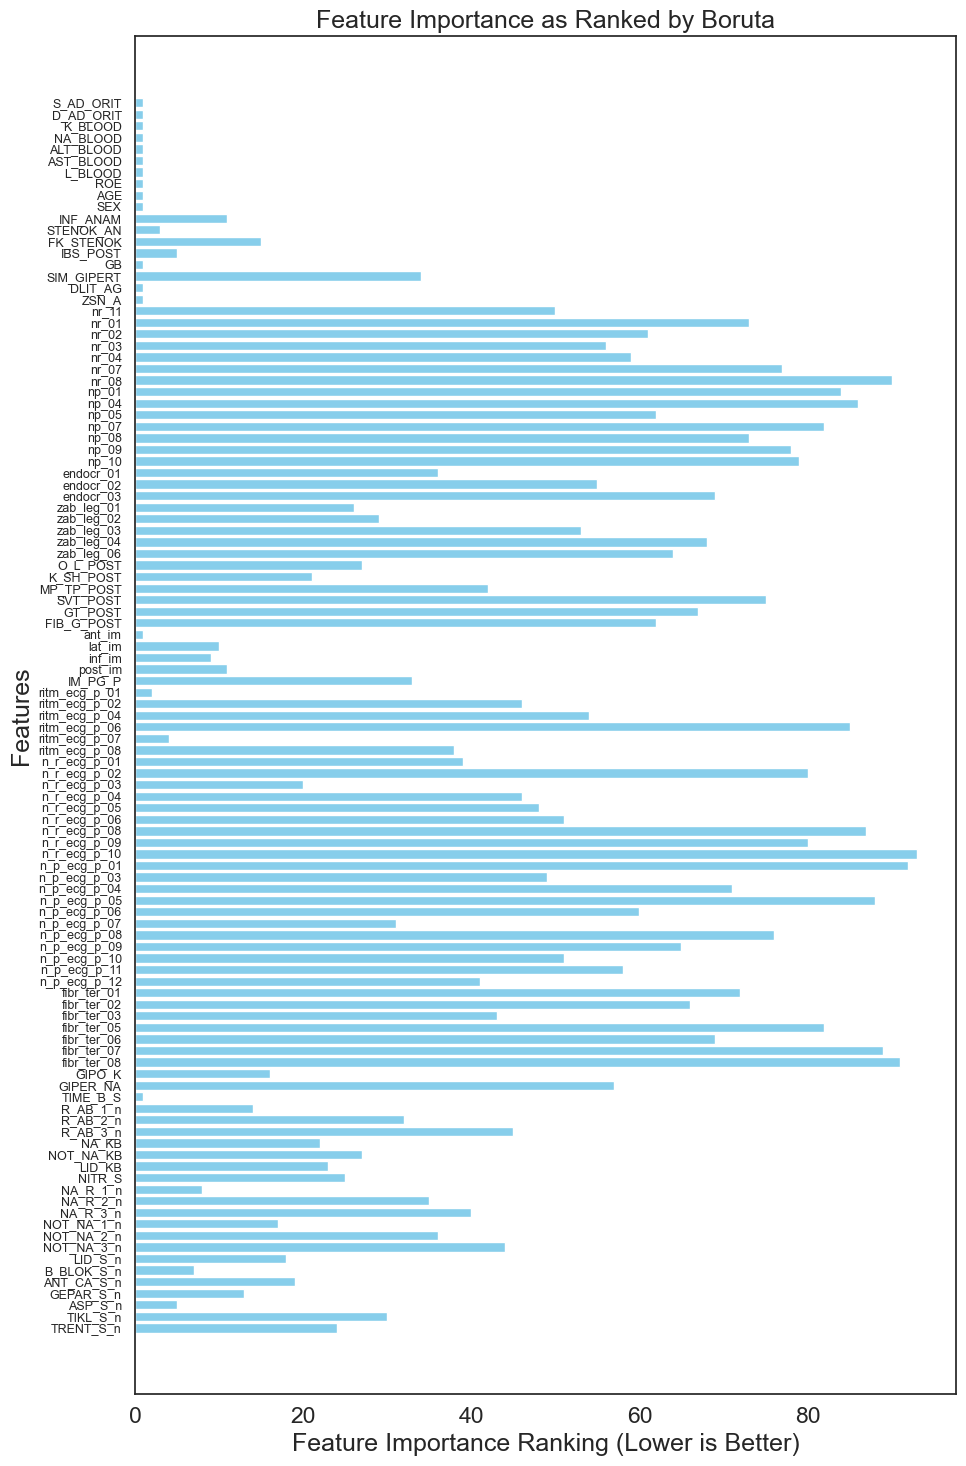

In [58]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

feature_names = ['S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT',
                 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
                 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im',
                 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
                 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06',
                 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07',
                 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n',
                 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

# Use a more robust random forest model as the base model for Boruta
rf_boruta = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1, random_state=0)

# Initialize Boruta, the estimator is a random forest, and the salient features are selected
boruta_selector = BorutaPy(estimator=rf_boruta, n_estimators='auto', random_state=0, max_iter=100)

# Parameters related to the early stop mechanism
early_stopping_rounds = 10  # If, in an iteration, the result of feature selection changes less than the number of rounds with this value, it is stopped early
last_selected_features = None  # Stores the features selected in the previous iteration

# Run Boruta feature selection with an early stop mechanism
iteration = 0
while iteration < boruta_selector.max_iter:
    boruta_selector.fit(u_scaled, y_resample)
    
    # Get the features selected for this iteration
    selected_features = boruta_selector.support_
    
    # Monitor whether there is no significant change in feature selection
    if last_selected_features is not None and np.array_equal(selected_features, last_selected_features):
        print(f"Early stopping: No significant change in feature selection after {iteration} iterations.")
        break
    
    last_selected_features = selected_features.copy()
    iteration += 1

# Gets the Boolean value of the feature selected by Boruta
boruta_support = boruta_selector.support_

# Extract the feature names selected by Boruta by masking
boruta_selected_features = [feature for feature, selected in zip(feature_names, boruta_support) if selected]
print("Boruta selected features:")
print(boruta_selected_features)

# Filter features based on the Boolean values of the features selected by Boruta
u_boruta = u_scaled[:, boruta_support]

print(f"Boruta with early stop, selected {u_boruta.shape[1]} features out of {u_scaled.shape[1]}")

# Plotting the importance of features as determined by Boruta
plt.figure(figsize=(10, 15))
plt.barh(feature_names, boruta_selector.ranking_, color='skyblue')
plt.xlabel('Feature Importance Ranking (Lower is Better)')
plt.ylabel('Features')
plt.yticks(fontsize=9)
plt.title('Feature Importance as Ranked by Boruta')
plt.gca().invert_yaxis()  # Highest rank at the top
plt.tight_layout()  # Ensure everything fits well
plt.show()


In [47]:
# Use u_rfe instead of u_scaled for train-test split
x_train, x_test, y_train, y_test = train_test_split(u_boruta, y_resample, test_size=0.2, random_state=0)

In [48]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
import os
import time
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_curve, auc, precision_recall_curve, confusion_matrix, 
                             make_scorer)
from sklearn.model_selection import cross_validate, learning_curve, GridSearchCV, KFold

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ]),
    "StackingClassifier": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
    ], final_estimator=LogisticRegression(), stack_method='predict_proba'),
    "BaggingClassifier": BaggingClassifier()
}

param_grids = {
    "Logistic Regression": {
        'C': [0.9, 0.95, 1, 1.05, 1.1], 
        'solver': ['liblinear', 'lbfgs'],  
    },
    
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 4, 5, 6, 7, 8],   
        'weights': ['distance'],              
        'p': [1, 2, 3]                        
    },
    
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],          
        'max_depth': [8, 10, 12, 15],              
        'min_samples_split': [18, 20, 22],         
        'min_samples_leaf': [1, 2, 5]              
    },
    
    "Support Vector Machine": {
        'C': [4, 5, 6, 7, 10],          
        'gamma': ['scale', 0.05, 0.1, 0.3, 0.5],  
        'kernel': ['rbf']                 
    },
    
    "AdaBoost": {
        'n_estimators': [350, 400, 450],
        'learning_rate': [0.3, 0.35, 0.4],
        'algorithm': ['SAMME']
    },
    
    "VotingClassifier": {
        'voting': ['soft'],
        'weights': [None, [2, 1, 2, 2], [3, 2, 1, 2],[2, 2, 1, 2]]
    },
    
    "StackingClassifier": {
        'cv': [3, 5],
        'final_estimator': [LogisticRegression(),
                           SVC(probability=True),
                            ],
        'stack_method': ['predict', 'predict_proba']
    },
    
    "BaggingClassifier": {
        'n_estimators': [200, 250, 300],
        'max_samples': [0.7,0.8,0.9, 1.0],
        'max_features': [0.3,0.4,0.5, 0.7, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }
}

# Define scoring metrics for cross-validation
scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',  # ROC AUC score
    'specificity': make_scorer(recall_score, pos_label=0),  # Custom scorer for specificity
    'pr_auc': 'average_precision'  # Precision-Recall AUC score
}

# Create folders for saving confusion matrices, ROC-AUC plots, Precision-Recall curves, and learning curves
new_folder = "ZSN_GridCVOptimizedML_Results_OBoruta01"
confusion_matrix_folder = os.path.join(new_folder, "confusion_matrices")
roc_auc_folder = os.path.join(new_folder, "roc_auc_curves")
precision_recall_folder = os.path.join(new_folder, "precision_recall_curves")
learning_curve_folder = os.path.join(new_folder, "learning_curves")
os.makedirs(confusion_matrix_folder, exist_ok=True)
os.makedirs(roc_auc_folder, exist_ok=True)
os.makedirs(precision_recall_folder, exist_ok=True)
os.makedirs(learning_curve_folder, exist_ok=True)

# Reset lists before appending results to avoid duplicates
results_train_test = []

# Loop through classifiers (including Stacking and Voting)
for name, clf in classifiers.items():
    print(f"Optimizing {name}...")

    # Apply GridSearchCV for parameter optimization if parameters are defined
    if name in param_grids:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_clf = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    else:
        # Use default classifier if no grid search is performed
        best_clf = clf.fit(x_train, y_train)

    # Train the classifier
    training_start = time.perf_counter()
    best_clf.fit(x_train, y_train)
    training_end = time.perf_counter()
    train_time = training_end - training_start

    # Make predictions
    if hasattr(best_clf, "predict_proba"):
        y_pred_proba = best_clf.predict_proba(x_test)[:, 1]
        y_pred = best_clf.predict(x_test)
    else:
        y_pred = best_clf.predict(x_test)
        y_pred_proba = None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    test_cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = test_cm.ravel()
    spec = tn / (tn + fp)

    # Calculate ROC-AUC score
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None

    # Calculate Precision-Recall AUC score
    if y_pred_proba is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
    else:
        pr_auc = None

    # Ensure that the results for the best model only are saved
    if name not in [result[0] for result in results_train_test]:
        # Store only the best result for each model
        results_train_test.append([
            name,
            f"{train_time:.4f}",  # Time in seconds
            f"{acc * 100:.2f}",   # Accuracy (%)
            f"{prec * 100:.2f}",  # Precision (%)
            f"{rec * 100:.2f}",   # Recall (%)
            f"{f1 * 100:.2f}",    # F1-Score (%)
            f"{spec * 100:.2f}",  # Specificity (%)
            f"{roc_auc * 100:.2f}" if roc_auc is not None else 'N/A',  # ROC-AUC (%)
            f"{pr_auc * 100:.2f}" if pr_auc is not None else 'N/A'     # PR AUC (%)
        ])

    # Generate and save confusion matrix
    plt.figure(figsize=(8, 6), dpi=600)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20})
    plt.title(f'ZSN_Confusion Matrix - {name}', fontsize=25)
    plt.xlabel('Predicted', fontsize=22)
    plt.ylabel('Actual', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    cm_plot_filepath = os.path.join(confusion_matrix_folder, f'confusion_matrix_{name}.png')
    plt.savefig(cm_plot_filepath)
    plt.close()

    # Plot and save ROC-AUC curve if available
    if roc_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=22)
        plt.ylabel('True Positive Rate', fontsize=22)
        plt.title(f'ZSN_ROC_AUC - {name}', fontsize=25)
        plt.legend(loc="lower right")
        roc_auc_filepath = os.path.join(roc_auc_folder, f'roc_auc_{name}.png')
        plt.savefig(roc_auc_filepath)
        plt.close()

    # Plot and save Precision-Recall curve if available
    if pr_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(recall, precision, color='blue', lw=2, label=f'PR AUC = {pr_auc:.3f}')
        plt.xlabel('Recall', fontsize=22)
        plt.ylabel('Precision', fontsize=22)
        plt.title(f'ZSN_Precision-Recall Curve- {name}', fontsize=25)
        plt.legend(loc="lower left")
        pr_curve_filepath = os.path.join(precision_recall_folder, f'precision_recall_{name}.png')
        plt.savefig(pr_curve_filepath)
        plt.close()
              
    # Plot and save learning curve
    train_sizes, train_scores, test_scores = learning_curve(best_clf, x_train, y_train, cv=KFold(5), n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6), dpi=600)
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.title(f'ZSN_Learning Curve - {name}', fontsize=25)
    plt.xlabel('Training Size', fontsize=22)
    plt.ylabel('Accuracy', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(loc="best")
    plt.tight_layout()
    learning_curve_filepath = os.path.join(learning_curve_folder, f'learning_curve_{name}.png')
    plt.savefig(learning_curve_filepath)
    plt.close()

# Define columns for train-test and cross-validation results
columns = ['Model', 'Time (s)', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Specificity (%)', 'ROC-AUC (%)', 'PR AUC (%)']

# Convert results to DataFrame and save to Excel
df_train_test = pd.DataFrame(results_train_test, columns=columns) 
with pd.ExcelWriter(os.path.join(new_folder, 'ZSN_GridCVOptimizedML_Results_OBoruta01.xlsx')) as writer:
    df_train_test.to_excel(writer, sheet_name='Train-Test Results', index=False)

print("Results saved successfully in 'ZSN_GridCVOptimizedML_Results_OBoruta01' folder.")


Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.9, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.6836
Optimizing K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.7956
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 22}
Best cross-validation accuracy for Decision Tree: 0.7272
Optimizing Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 4, 'gamma': 0.5, 'kernel': 'rbf'}
Best cross-validation accuracy for Support Vector Machine: 0.8167
Optimizing AdaBoost...
Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 0.3, 'n_estimators': 450}
Best cross-validation accuracy for AdaBoost: 0.7137
Optimizing VotingClassifier...
Best parameters for VotingClassifier: {'voti

LASSO selected 82 features out of 107
Selected Features from LASSO:
['D_AD_ORIT', 'K_BLOOD', 'ALT_BLOOD', 'L_BLOOD', 'ROE', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_03', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_08', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_07', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPER_NA', 'TIME_B_S', 'R_AB_2_n', 'NA_KB', 'LID_KB', 'NA_R_1_n', 'N

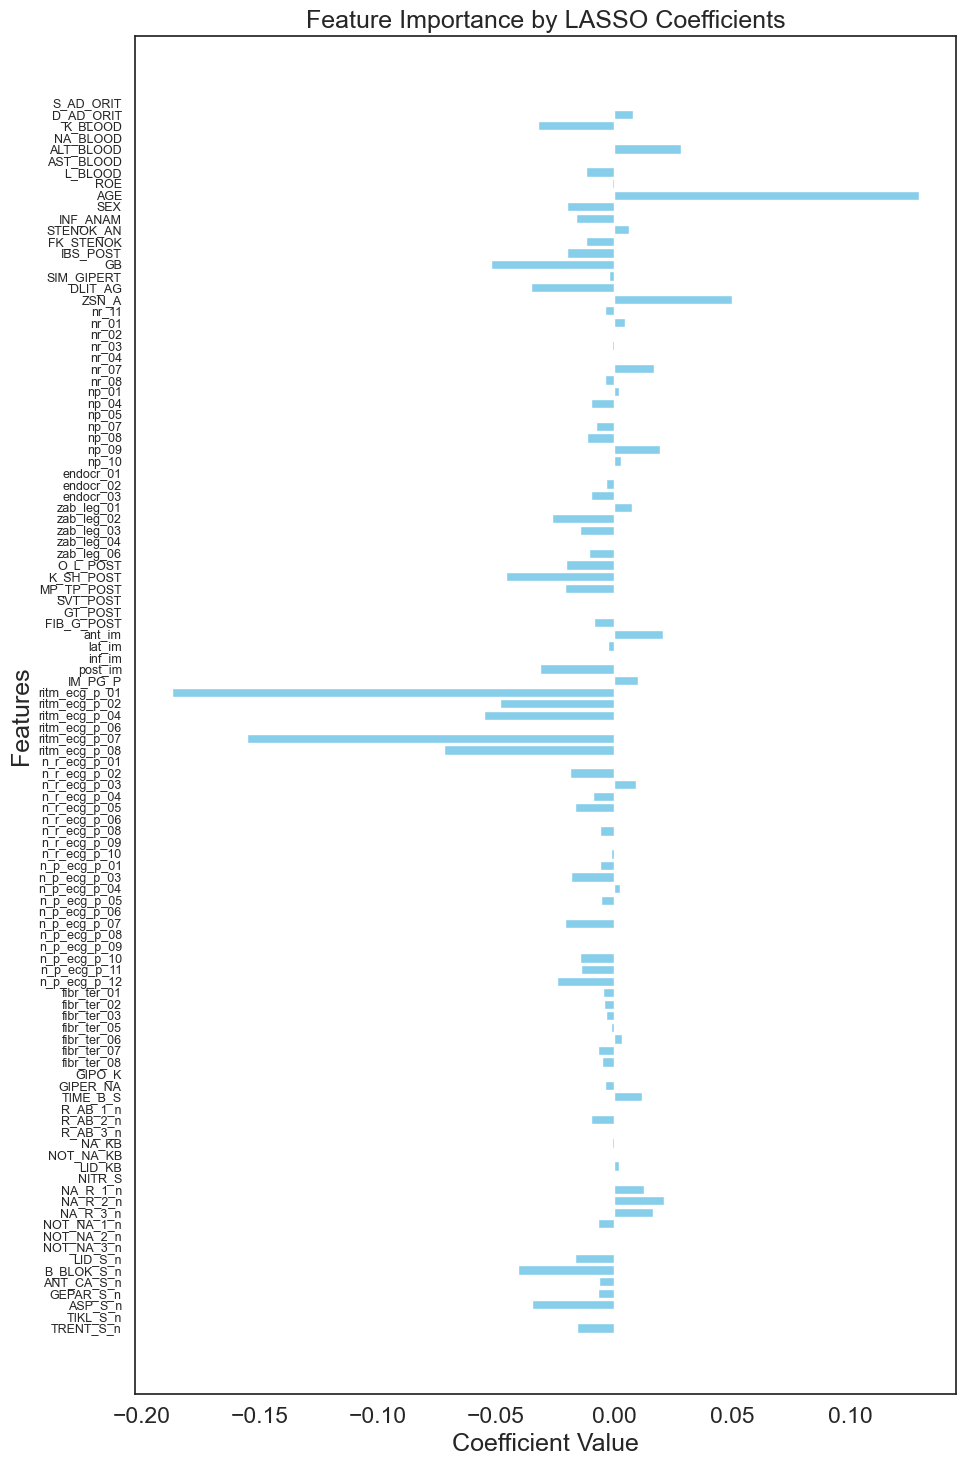

In [57]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Actual feature names from the dataset
feature_names = ['S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT',
                 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
                 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im',
                 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
                 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06',
                 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07',
                 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n',
                 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

# Initialize LassoCV for automatic alpha selection
lasso = LassoCV(cv=10, random_state=0)

# Fit Lasso to find the optimal alpha and perform feature selection
lasso.fit(u_scaled, y_resample)

# Use SelectFromModel to select the important features
model = SelectFromModel(lasso, prefit=True)
u_lasso = model.transform(u_scaled)

print(f"LASSO selected {u_lasso.shape[1]} features out of {u_scaled.shape[1]}")

# Get the coefficients for the selected features
selected_features = [feature for feature, coef in zip(feature_names, lasso.coef_) if coef != 0]

print("Selected Features from LASSO:")
print(selected_features)

# Step 3: Use RandomForest to further select important features
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(u_lasso, y_resample)

# Use SelectFromModel to select important features from the RandomForest
rf_selector = SelectFromModel(rf_model, prefit=True)
u_final = rf_selector.transform(u_lasso)

print(f"Final selection retained {u_final.shape[1]} features out of {u_lasso.shape[1]}")

# Get the final selected features
final_selected_features = [selected_features[i] for i in range(len(selected_features)) if rf_selector.get_support()[i]]

print("Final Selected Features after RandomForest:")
print(final_selected_features)

# Plot the coefficients of the LASSO model
plt.figure(figsize=(10, 15))
plt.barh(feature_names, lasso.coef_, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.yticks(fontsize=9)
plt.title('Feature Importance by LASSO Coefficients')
plt.gca().invert_yaxis()  # Highest coefficients on top
plt.tight_layout()  # Ensure the layout fits within the figure area
plt.show()


In [50]:
# Use u_final instead of u_scaled for train-test split
x_train, x_test, y_train, y_test = train_test_split(u_final, y_resample, test_size=0.2, random_state=0)

In [51]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
import os
import time
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_curve, auc, precision_recall_curve, confusion_matrix, 
                             make_scorer)
from sklearn.model_selection import cross_validate, learning_curve, GridSearchCV, KFold

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ]),
    "StackingClassifier": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
    ], final_estimator=LogisticRegression(), stack_method='predict_proba'),
    "BaggingClassifier": BaggingClassifier()
}

param_grids = {
    "Logistic Regression": {
        'C': [0.9, 0.95, 1, 1.05, 1.1], 
        'solver': ['liblinear', 'lbfgs'],  
    },
    
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 4, 5, 6, 7, 8],   
        'weights': ['distance'],              
        'p': [1, 2, 3]                        
    },
    
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],          
        'max_depth': [8, 10, 12, 15],              
        'min_samples_split': [18, 20, 22],         
        'min_samples_leaf': [1, 2, 5]              
    },
    
    "Support Vector Machine": {
        'C': [4, 5, 6, 7, 10],          
        'gamma': ['scale', 0.05, 0.1, 0.3, 0.5],  
        'kernel': ['rbf']                 
    },
    
    "AdaBoost": {
        'n_estimators': [350, 400, 450],
        'learning_rate': [0.3, 0.35, 0.4],
        'algorithm': ['SAMME']
    },
    
    "VotingClassifier": {
        'voting': ['soft'],
        'weights': [None, [2, 1, 2, 2], [3, 2, 1, 2],[2, 2, 1, 2]]
    },
    
    "StackingClassifier": {
        'cv': [3, 5],
        'final_estimator': [LogisticRegression(),
                           SVC(probability=True),
                            ],
        'stack_method': ['predict', 'predict_proba']
    },
    
    "BaggingClassifier": {
        'n_estimators': [200, 250, 300],
        'max_samples': [0.7,0.8,0.9, 1.0],
        'max_features': [0.3,0.4,0.5, 0.7, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }
}

# Define scoring metrics for cross-validation
scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',  # ROC AUC score
    'specificity': make_scorer(recall_score, pos_label=0),  # Custom scorer for specificity
    'pr_auc': 'average_precision'  # Precision-Recall AUC score
}

# Create folders for saving confusion matrices, ROC-AUC plots, Precision-Recall curves, and learning curves
new_folder = "ZSN_GridCVOptimizedML_Results_OLasso01"
confusion_matrix_folder = os.path.join(new_folder, "confusion_matrices")
roc_auc_folder = os.path.join(new_folder, "roc_auc_curves")
precision_recall_folder = os.path.join(new_folder, "precision_recall_curves")
learning_curve_folder = os.path.join(new_folder, "learning_curves")
os.makedirs(confusion_matrix_folder, exist_ok=True)
os.makedirs(roc_auc_folder, exist_ok=True)
os.makedirs(precision_recall_folder, exist_ok=True)
os.makedirs(learning_curve_folder, exist_ok=True)

# Reset lists before appending results to avoid duplicates
results_train_test = []

# Loop through classifiers (including Stacking and Voting)
for name, clf in classifiers.items():
    print(f"Optimizing {name}...")

    # Apply GridSearchCV for parameter optimization if parameters are defined
    if name in param_grids:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_clf = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    else:
        # Use default classifier if no grid search is performed
        best_clf = clf.fit(x_train, y_train)

    # Train the classifier
    training_start = time.perf_counter()
    best_clf.fit(x_train, y_train)
    training_end = time.perf_counter()
    train_time = training_end - training_start

    # Make predictions
    if hasattr(best_clf, "predict_proba"):
        y_pred_proba = best_clf.predict_proba(x_test)[:, 1]
        y_pred = best_clf.predict(x_test)
    else:
        y_pred = best_clf.predict(x_test)
        y_pred_proba = None

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    test_cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = test_cm.ravel()
    spec = tn / (tn + fp)

    # Calculate ROC-AUC score
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None

    # Calculate Precision-Recall AUC score
    if y_pred_proba is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
    else:
        pr_auc = None

    # Ensure that the results for the best model only are saved
    if name not in [result[0] for result in results_train_test]:
        # Store only the best result for each model
        results_train_test.append([
            name,
            f"{train_time:.4f}",  # Time in seconds
            f"{acc * 100:.2f}",   # Accuracy (%)
            f"{prec * 100:.2f}",  # Precision (%)
            f"{rec * 100:.2f}",   # Recall (%)
            f"{f1 * 100:.2f}",    # F1-Score (%)
            f"{spec * 100:.2f}",  # Specificity (%)
            f"{roc_auc * 100:.2f}" if roc_auc is not None else 'N/A',  # ROC-AUC (%)
            f"{pr_auc * 100:.2f}" if pr_auc is not None else 'N/A'     # PR AUC (%)
        ])

    # Generate and save confusion matrix
    plt.figure(figsize=(8, 6), dpi=600)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20})
    plt.title(f'ZSN_Confusion Matrix - {name}', fontsize=25)
    plt.xlabel('Predicted', fontsize=22)
    plt.ylabel('Actual', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    cm_plot_filepath = os.path.join(confusion_matrix_folder, f'confusion_matrix_{name}.png')
    plt.savefig(cm_plot_filepath)
    plt.close()

    # Plot and save ROC-AUC curve if available
    if roc_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=22)
        plt.ylabel('True Positive Rate', fontsize=22)
        plt.title(f'ZSN_ROC_AUC - {name}', fontsize=25)
        plt.legend(loc="lower right")
        roc_auc_filepath = os.path.join(roc_auc_folder, f'roc_auc_{name}.png')
        plt.savefig(roc_auc_filepath)
        plt.close()

    # Plot and save Precision-Recall curve if available
    if pr_auc is not None:
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(recall, precision, color='blue', lw=2, label=f'PR AUC = {pr_auc:.3f}')
        plt.xlabel('Recall', fontsize=22)
        plt.ylabel('Precision', fontsize=22)
        plt.title(f'ZSN_Precision-Recall Curve- {name}', fontsize=25)
        plt.legend(loc="lower left")
        pr_curve_filepath = os.path.join(precision_recall_folder, f'precision_recall_{name}.png')
        plt.savefig(pr_curve_filepath)
        plt.close()
              
    # Plot and save learning curve
    train_sizes, train_scores, test_scores = learning_curve(best_clf, x_train, y_train, cv=KFold(5), n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6), dpi=600)
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.title(f'ZSN_Learning Curve - {name}', fontsize=25)
    plt.xlabel('Training Size', fontsize=22)
    plt.ylabel('Accuracy', fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(loc="best")
    plt.tight_layout()
    learning_curve_filepath = os.path.join(learning_curve_folder, f'learning_curve_{name}.png')
    plt.savefig(learning_curve_filepath)
    plt.close()

# Define columns for train-test and cross-validation results
columns = ['Model', 'Time (s)', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Specificity (%)', 'ROC-AUC (%)', 'PR AUC (%)']

# Convert results to DataFrame and save to Excel
df_train_test = pd.DataFrame(results_train_test, columns=columns) 
with pd.ExcelWriter(os.path.join(new_folder, 'ZSN_GridCVOptimizedML_Results_OLasso01.xlsx')) as writer:
    df_train_test.to_excel(writer, sheet_name='Train-Test Results', index=False)

print("Results saved successfully in 'ZSN_GridCVOptimizedML_Results_OLasso01' folder.")


Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.9, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.7209
Optimizing K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8009
Optimizing Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation accuracy for Decision Tree: 0.7348
Optimizing Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy for Support Vector Machine: 0.8090
Optimizing AdaBoost...
Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 0.4, 'n_estimators': 450}
Best cross-validation accuracy for AdaBoost: 0.7520
Optimizing VotingClassifier...
Best parameters for VotingClassifier: {'voti